In [1]:
# Importando las librerías que vamos a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers is in row format, in the cell below load the **data_all.csv** and explore it.

In [2]:
# Para visualizar el total de columnas y renglones

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('data_all.csv')
df.head(3)

,e,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,21.0,37.0,37.0,21.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,50.0,115.0,172.0,215.0,215.0,170.0,78.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,158.0,219.0,241.0,242.0,221.0,217.0,232.0,206.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,159.0,245.0,232.0,145.0,114.0,51.0,41.0,146.0,243.0,164.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,95.0,231.0,222.0,123.0,22.0,4.0,0.0,4.0,127.0,250.0,245.0,158.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,77.0,218.0,248.0,139.0,12.0,0.0,0.0,0.0,5.0,129.0,250.0,254.0,215.0,37.0,0.0,0

Define your X and y (target) for our classification models 

In [4]:
X = np.array(df.drop(columns = 'e'))
y = np.array(df['e'])

print('En total tenemos', X.shape[0], 'registros')

En total tenemos 116322 registros


To solve this lab you need to reshape it into 28x28 pixels in a variable called `x_images`. <br> **Hint:** You can use *np.reshape(size of data, 28, 28))*

In [5]:
X_images = X.reshape(X.shape[0], 28, 28)

Before applying a model, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

0.0 is:
1.0 is:
2.0 is:


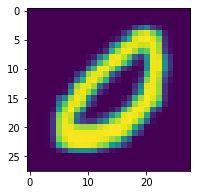

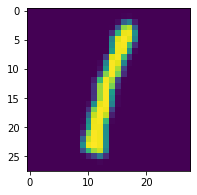

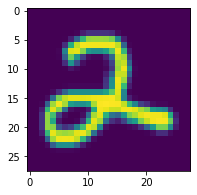

In [6]:
# Para descubrir qué etiqueta corresponde a número, lower o upper podríamos hacer algo como sigue:

for j in sorted(list(df.e.unique()))[:3]:
    i = df[df.e == j].index[0]
    print(y[i],'is:')
    plt.figure(figsize=(3,3))
    plt.imshow(X_images[i]);

In [7]:
# La idea es descubrir que las Labels están ordenados como: 0-9 -> dígitos del 1-9, 10-35 -> A-Z, 36-61 -> a-z

df_numbers = df[(df.e >= 0) & (df.e <= 9)] # range(0,10)
df_lower = df[(df.e >= 10) & (df.e <= 35)] # range(10,36)
df_upper = df[df.e > 35] # range(36,62)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [8]:
# Decidí definir una función que nos ayude en los tres casos

def evaluacion_clasificacion(data):

    X = np.array(data.drop(columns = 'e'))
    y = np.array(data['e'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .2)

    #Decision Tree
    print('Árboles de decisión:')
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train, y_train)
    print('  Score - train:', tree_model.score(X_train, y_train))
    print('  Score - test:', tree_model.score(X_test, y_test))

    #Random forest
    print('Random forest:')
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    print('  Score - train:', rfc.score(X_train,y_train))
    print('  Score - test:', rfc.score(X_test,y_test))

    #Gaussian NB
    print('Gaussian NB:')
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    print('  Score - train:', nb.score(X_train, y_train))
    print('  Score - test:', nb.score(X_test, y_test))

    # KNN
    print('KNN:')
    classifier = KNeighborsClassifier(1000, weights='distance')
    classifier.fit(X_train, y_train)
    print('  Score - train:', classifier.score(X_train, y_train))
    print('  Score - test:', classifier.score(X_test, y_test))

In [9]:
evaluacion_clasificacion(df_upper)

Árboles de decisión:
  Score - train: 1.0
  Score - test: 0.6480506282335551
Random forest:
  Score - train: 1.0
  Score - test: 0.8361973392461197
Gaussian NB:
  Score - train: 0.32396969136943266
  Score - test: 0.27208056171470807
KNN:
  Score - train: 1.0
  Score - test: 0.4126478196600148


* Try to do the same thing with numbers.

In [10]:
evaluacion_clasificacion(df_numbers)

Árboles de decisión:
  Score - train: 1.0
  Score - test: 0.8417610877306572
Random forest:
  Score - train: 1.0
  Score - test: 0.9581310024819251
Gaussian NB:
  Score - train: 0.6234999568332902
  Score - test: 0.6112441998489263
KNN:
  Score - train: 1.0
  Score - test: 0.7193698068414806


* Try to do the same thing with lowercases.

In [11]:
evaluacion_clasificacion(df_lower)

Árboles de decisión:
  Score - train: 1.0
  Score - test: 0.6362258733450311
Random forest:
  Score - train: 1.0
  Score - test: 0.8600654011804115
Gaussian NB:
  Score - train: 0.44775881320784816
  Score - test: 0.41541713191896634
KNN:
  Score - train: 1.0
  Score - test: 0.40843834742383156
